In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

**Question 1:**

In [4]:
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, .5, .25, .125, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, (3/2), (9/4), (27/8)],
    [0, 0, 0, 0, 1, 2, 4, 8],
    [0, 1, 2, 3, 0, -1, -2, -3],
    [0, 0, 2, 6, 0, 0, -2, -6]
])

b = np.array([2, 0, 1, 1, 2, 0, 0, 0])

In [9]:
a = LA.solve(A, b)
a

array([ 2., -9., 12., -4.,  2., -9., 12., -4.])

In [55]:
# Generate x values for each interval
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(1, 2, 100)

def y1(x):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

def y2(x):
    return a[4] + a[5]*x + a[6]*x**2 + a[7]*x**3

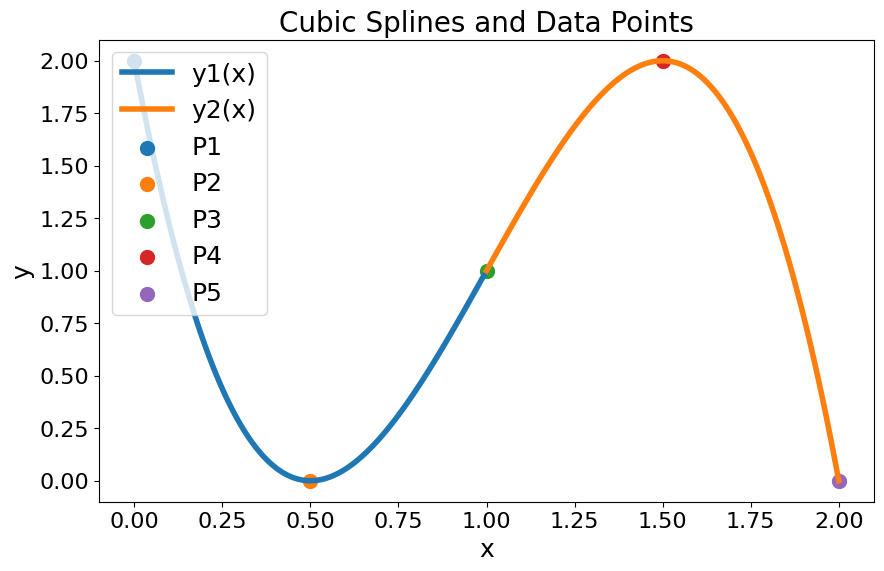

In [56]:
# Define the data points
data_points = {
    'P1': (0, 2),
    'P2': (0.5, 0),
    'P3': (1, 1),
    'P4': (1.5, 2),
    'P5': (2, 0)
}

# Generate y values using y1 and y2
y_interval_1 = y1(x1)
y_interval_2 = y2(x2)

# Plot the cubics, linewidth of 4 and markersize of 10
plt.figure(figsize=(10, 6))
plt.plot(x1, y_interval_1, label='y1(x)', linewidth=4, markersize=10)
plt.plot(x2, y_interval_2, label='y2(x)', linewidth=4, markersize=10)

# Plot points
for point, coordinates in data_points.items():
    plt.scatter(*coordinates, label=point, s=100, marker='o')

# Create labels and title with 18pt font
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('Cubic Splines and Data Points', fontsize=20)

# Create legend with 18pt font
plt.legend(fontsize=18)

# Set tick font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

**Question 2:**

In [57]:
X_data = np.array([[1, 1], [-1, -1], [0, 1], [1, 0], [1, 2], [2, 1]])
y_data = np.array([0.1, 5.95, 0.8, 2.1, -1.8, -1.05])

In [58]:
# add column of ones for intercept term
X = np.c_[np.ones(X_data.shape[0]), X_data]
X

array([[ 1.,  1.,  1.],
       [ 1., -1., -1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  2.],
       [ 1.,  2.,  1.]])

In [64]:
XTX = X.T @ X
XTy = X.T @ y_data
beta = LA.solve(XTX, XTy)
print("coeffs: ", beta)

coeffs:  [ 2.97692308 -0.95769231 -1.98269231]


In [65]:
print("Regression model: f(x) = {:.4f} + {:.4f}*x_1 + {:.4f}*x_2".format(beta[0], beta[1], beta[2]))

Regression model: f(x) = 2.9769 + -0.9577*x_1 + -1.9827*x_2


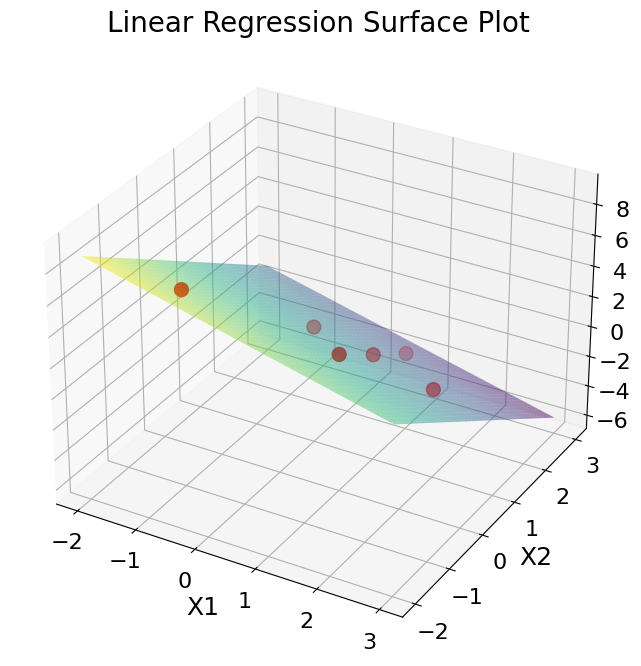

In [68]:
# Creating meshgrid for plot
x1_range = np.linspace(-2, 3, 100)
x2_range = np.linspace(-2, 3, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Our regression model
f_hat = beta[0] + beta[1] * x1_mesh + beta[2] * x2_mesh

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of model
ax.plot_surface(x1_mesh, x2_mesh, f_hat, alpha=0.5, cmap='viridis', label=r'$\hat{f}$', linewidth=0)

# Adding our data points:
ax.scatter(X_data[:, 0], X_data[:, 1], y_data, color='red', s=100, label='Data Points')

# Labeling
ax.set_xlabel('X1', fontsize=18)
ax.set_ylabel('X2', fontsize=18)
ax.set_zlabel('Y', fontsize=18)
ax.set_title('Linear Regression Surface Plot', fontsize=20)
#ax.legend(fontsize=18)
ax.tick_params(labelsize=16)

# Display the plot
plt.show()

In [70]:
# Finding residual SS:
y_hat = X @ beta
RSS = np.sum((y_data - y_hat)**2)
print("RSS: ", RSS)

RSS:  0.08730769230769221


**Question 3:**

In [76]:
# regularization param
lambda_val_1 = 1

# design matrix
X_data = np.array([[1, 1, 1],
              [1, -1, -1],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 2],
              [1, 2, 1]])

y_data = np.array([0.1, 5.95, 0.8, 2.1, -1.8, -1.05])

In [77]:
# Normal equation matrix A = X^T*X + lambda^2*Identity
X = X_data
y = y_data
A = X.T@X + (lambda_val_1**2 * np.identity(3))
beta = LA.solve(A, X.T@y)

In [80]:
print("beta vals (lambda=1): ", beta)

beta vals (lambda = 1):  [ 2.20410959 -0.82442922 -1.50776256]


In [79]:
# Part c:
lambda_val_2 = 2

A2 = X.T@X + (lambda_val_2**2 * np.identity(3))
beta2 = LA.solve(A2, X.T@y_data)

In [81]:
print("beta vals (lambda=2): ", beta2)

beta vals (lambda = 2):  [ 1.21081081 -0.58018018 -0.92184685]


In [83]:
# Part d:

# Finding RSS with lambda=1:
y_pred = X @ beta
rss1 = np.sum((y - y_pred)**2)
print("rss with lambda=1: ", rss1)

rss with lambda=1:  2.6166205875607265


In [84]:
# Part d:
# Finding RSS with lambda=2:
y_pred2 = X @ beta2
rss2 = np.sum((y - y_pred2)**2)
print("rss with lambda=2: ", rss2)

rss with lambda=2:  13.428867380894411
